# Task 7 - 05 June 2025

# **Support Vector Machines (SVM)**

### *Importing Required Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


### *Loading Dataset*

In [2]:
df = pd.read_csv("breast cancer data.csv")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### *Basic Exploration*

In [4]:
# Dataset shape and info
print("Shape of dataset:", df.shape)
df.info()

# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14

### *Encoding Target and Spliting Features/Target*

In [5]:
# Assuming the target column is 'diagnosis' (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Droping unnecessary columns like 'id' 
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

# Separating features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


### *Train-Test Split and Scaling*

In [6]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **SVM with Linear Kernel**

In [8]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_svm.predict(X_test_scaled)

# Evaluation
print("SVM with Linear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


SVM with Linear Kernel:
Accuracy: 0.956140350877193
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## **SVM with RBF Kernel**

In [9]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Evaluation
print("SVM with RBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


SVM with RBF Kernel:
Accuracy: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### *Hyperparameter Tuning using GridSearchCV*

In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

# Best estimator results
print("Best Parameters:", grid.best_params_)

y_pred_grid = grid.predict(X_test_scaled)
print("Accuracy after Tuning:", accuracy_score(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy after Tuning: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### *Cross-Validation Score*

In [11]:
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())


Cross-validation scores: [0.89473684 0.90350877 0.92105263 0.93859649 0.88495575]
Mean cross-validation accuracy: 0.9085700978108988


### *Visualize Decision Boundary (Using 2 Features Only)*

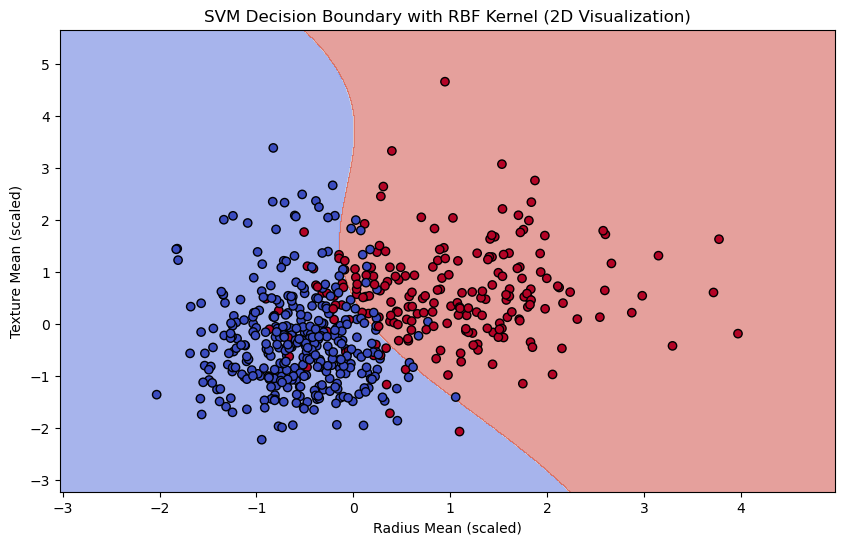

In [14]:
# Using 2 features from the dataset for 2D visualization
X_vis = df[['radius_mean', 'texture_mean']].values
y_vis = df['diagnosis'].values

# Scaling the features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Fit SVM model on 2D features
svm_vis = SVC(kernel='rbf', C=1, gamma=0.1)
svm_vis.fit(X_vis_scaled, y_vis)

# Creating a mesh grid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicting over the mesh grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ploting decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Radius Mean (scaled)")
plt.ylabel("Texture Mean (scaled)")
plt.title("SVM Decision Boundary with RBF Kernel (2D Visualization)")
plt.show()
